# Unleashing the Power of Data: Analyzing Box Offices Success to Shape Microsoft's New Movie Studio strategy 

## 1. Business Understanding

## Introduction

>In today's dynamic entertainment landscape, the demand for original video content is skyrocketing, with major companies establishing their own movie studios to captivate audiences. Inspired by this trend, Microsoft has embarked on a mission to venture into the realm of filmmaking by creating its own movie studio. However, given their limited knowledge and experience in the domain, Microsoft is confronted with a crucial challenge: Determining the types of films that are currently enjoying significant success at the box office. This is where data analysis and exploration come into play.

>As a data analyst, my role is pivotal in unraveling the intricate dynamics of the film industry, focusing specifically on box office performance. By delving into the realm of cinema, I will uncover valuable insights that can inform the head of Microsoft's new movie studio in making informed decisions about the types of films to produce. This project aims to leverage the power of data to provide actionable recommendations that will guide Microsoft in creating compelling content, tailored to capture the hearts and minds of moviegoers, and position the company as a major player in the ever-evolving world of film production.

## Problem Statement

>Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create

## Main Objective

>The main objective of this project is to conduct exploratory data analysis to identify the types of films that are currently performing exceptionally well at the box office. By analyzing relevant data and trends in the film industry, the goal is to provide actionable insights to the head of Microsoft's new movie studio. These insights will assist in making informed decisions regarding the types of films to create, ensuring alignment with audience preferences and increasing the studio's chances of achieving commercial success.

## Experimental Design

>1. Data Collection
>2. Data Processing
>3. Exploratory Data Analysis
>4. Findings and Insights
>5. Decision Making

## Data Understanding

>The data being used is from `im.db` database. The database has 8 tables:

>>- movie_basics
>>- directors
>>- known_for
>>- movie_akas
>>- movie_ratings
>>- persons
>>- principals
>>- writers

>The `movie_ratings` and `movie_basics` tables will be used in the analysis. `movie_ratings` provides information on movie ratings while `movie_basics` table provides information on various movie attributes such as start_year, runtime and genre.

## 2. Reading the Data

In [23]:
import zipfile
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import warnings
%matplotlib inline
warnings.simplefilter(action='ignore', category=Warning)

In [4]:
with zipfile.ZipFile("Data/im.db.zip", 'r') as zip_file:
    zip_file.extractall("Data")

    
conn = sqlite3.connect("Data/im.db")
sql_query = """SELECT name FROM sqlite_master WHERE type = 'table';"""
tables = pd.read_sql(sql_query,conn)
tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers




## 3. Checking the Data

In [5]:
# Previewing the movie_basics table
pd.read_sql("""
SELECT * FROM movie_basics
""", conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
# Previewing the known_for table
pd.read_sql("""
SELECT * FROM known_for
""", conn).head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [7]:
# Previewing the movie_ratings table
pd.read_sql("""
SELECT * FROM movie_ratings
""", conn).head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [8]:
#Joining the movie_basics and movie_ratings tables

df = pd.read_sql("""
SELECT * FROM movie_basics
JOIN movie_ratings
USING (movie_id)
""", conn)
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


## 4. Tidying the Dataset

In [9]:
#Checking the shape of the dataframe
df.shape

(73856, 8)

In [10]:
#Checking for missing values and their percentages

(df.isna().sum()*100/df.shape[0]).round(2)

movie_id            0.00
primary_title       0.00
original_title      0.00
start_year          0.00
runtime_minutes    10.32
genres              1.09
averagerating       0.00
numvotes            0.00
dtype: float64

In [11]:
#Dropping irrelevant columns and rows that contain null values
df.drop(df.columns[1:5].tolist(),1,inplace=True)
df.dropna(inplace=True)

In [12]:
# Checking the final dataframe; shape and any missing values
print(df.shape)
df.isna().any()

(73052, 4)


movie_id         False
genres           False
averagerating    False
numvotes         False
dtype: bool

In [13]:
# Checking for any duplicates
df[df.duplicated()]

,movie_id,genres,averagerating,numvotes


In [14]:
# A glance of the final dataframe
df.head()

,movie_id,genres,averagerating,numvotes
0,tt0063540,"Action,Crime,Drama",7.0,77
1,tt0066787,"Biography,Drama",7.2,43
2,tt0069049,Drama,6.9,4517
3,tt0069204,"Comedy,Drama",6.1,13
4,tt0100275,"Comedy,Drama,Fantasy",6.5,119


## 6. Exploratory Analysis

In [15]:
#Split the genres column
df['genres'] = df['genres'].map(lambda x: x.split(',')[0])
df.head()

,movie_id,genres,averagerating,numvotes
0,tt0063540,Action,7.0,77
1,tt0066787,Biography,7.2,43
2,tt0069049,Drama,6.9,4517
3,tt0069204,Comedy,6.1,13
4,tt0100275,Comedy,6.5,119


In [16]:
df['genres'].value_counts()

Drama          18572
Comedy         14649
Documentary    13962
Action          6988
Horror          4490
Biography       3433
Adventure       2596
Crime           2494
Thriller        1563
Animation        962
Romance          786
Family           604
Mystery          433
Fantasy          429
Sci-Fi           388
Music            192
Musical          153
History          136
Sport             89
Western           75
War               47
Reality-TV         5
News               4
Game-Show          1
Adult              1
Name: genres, dtype: int64

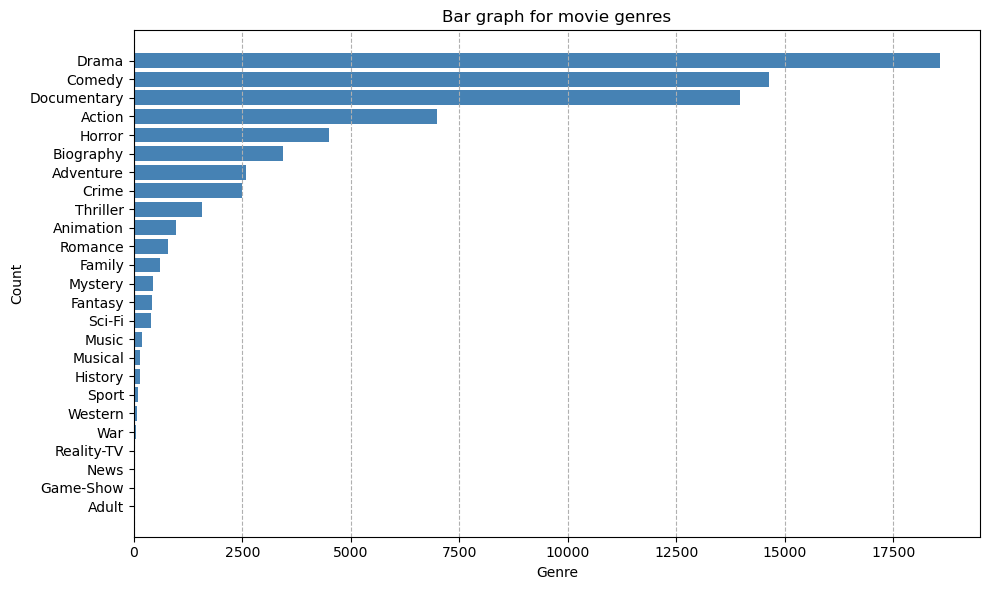

In [17]:
count = df['genres'].value_counts(ascending = True)
x, y =  count.index.tolist(), count.values.tolist()

fig, ax = plt.subplots(figsize=(10,6))
ax.barh(x, y, color = 'steelblue')
ax.set_title('Bar graph for movie genres')
ax.set_xlabel('Genre')
ax.set_ylabel('Count')
ax.grid(axis='x', linestyle='--')

plt.tight_layout()

In [18]:
# Data Reduction (dropping genres with low count)
low_genres = df['genres'].value_counts().index[df['genres'].value_counts().values < 500].tolist()
df = df.drop(df[df['genres'].isin(low_genres)].index)
df['genres'].value_counts()

Drama          18572
Comedy         14649
Documentary    13962
Action          6988
Horror          4490
Biography       3433
Adventure       2596
Crime           2494
Thriller        1563
Animation        962
Romance          786
Family           604
Name: genres, dtype: int64

>Excluding genres with low counts is essential to obrain reliable ratings, The genre `short`, for example has a count of one and a rating of 9.0 which can produce a misleading representation

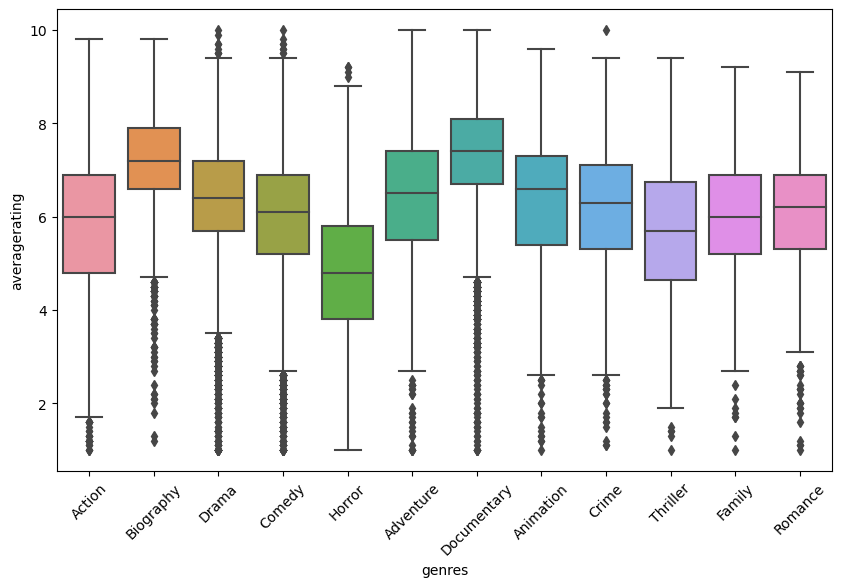

In [30]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='genres', y='averagerating', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45);

>In movie ratings data, one measure of variation that is useful is the standard deviation. The standard deviation measures the dispersion or spread of the ratings within the dataset. It provides an indication of how much the ratings deviate from the average or mean rating.

>By calculating the standard deviation of movie ratings, you can assess the level of agreement or disagreement among viewers. A smaller standard deviation indicates that the ratings tend to be close to the mean, suggesting a higher level of consensus among viewers. On the other hand, a larger standard deviation implies a wider range of ratings, indicating a greater diversity of opinions and preferences among viewers.

In [20]:
df.groupby('genres')['averagerating'].std().sort_values(ascending = False)

genres
Action         1.513833
Animation      1.460460
Thriller       1.455715
Horror         1.447854
Family         1.425229
Adventure      1.424851
Comedy         1.398988
Romance        1.352398
Crime          1.346894
Drama          1.271630
Documentary    1.108860
Biography      1.062452
Name: averagerating, dtype: float64

>The close standard deviation among movie ratings of different genres suggests a relatively low level of variation or disagreement in ratings between the genres. This could mean that viewers tend to perceive and rate movies from different genres in a similar manner or a similar level of quality across genres. The latter could mean that filmmakers or studios successfully deliver a certain level of storytelling, production value, or artistic merit that is appreciated by viewers across different genres. 

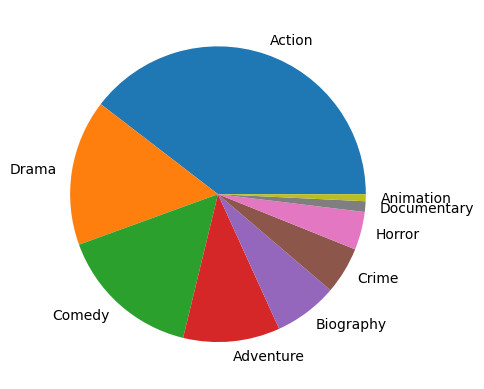

In [33]:
#Plotting a pie chart of the number of votes in each genre

vote_count = df.groupby('genres')['numvotes'].sum().sort_values(ascending = False)
labels = vote_count.index.tolist()[:9]
votes = vote_count.values.tolist()[:9]
fig, ax = plt.subplots()
ax.pie(votes, labels=labels);

>The number of votes in movie genres can provide insights into various aspects related to audience engagement, popularity, and the level of interest in specific genres. A larger number of votes like the case of Action and Drama genres indicate a higher level of engagement or interest from the audience in a particular genre. It implies that viewers are actively seeking out and participating in discussions, rating, or reviewing movies from that genre. Additionally, if a genre consistently receives a higher number of votes compared to others, it suggests that it appeals to a larger segment of the audience.

## 7. Findings and Insight

>Before deciding on a movie genre to move into, several factors should be considered to make an informed decision. Some of the factors to consider are:

>>1. Target Audience
>>2. Storytelling Potential
>>3. Market Saturation and Trends

>From the exploratory data analysis exercise, Action, Drama, Comedy and Documentary genres are preffered genres that the new Microsoft movie studio should priorotize. The four genres have a large community as shown in the pie chart. However, action genre has more variation in ratings which could indicate a lack of consensus or agreement among the audience. Biography movies have the least variation in their ratings but a lower audience size. Animation, Horror and Thriller movies have a high variation in rating and a low audience size this is less desirable. 

## 8. Recommendations

> The new movie studio has a variety of genres to choose from. However, the most suitable genres are Action, Comedy and Documentary movies. Action movies have a large audience size and a higher variation in rating which allows for a greater storytelling potential.This will allow for the production of compelling stories that resonate with the audience.

>The comedy genre has a relatively large audience and standard deviation in movie ratings. The larger audience makes it more suitable for production. The target audience plays a crucial role in the selection of a movie genre. The audience is the primary consumer of movies, and their preferences and interests greatly influence the success and reception of a film. A larger audience in Action and Comedy genres will increase the reception of movies produced by the studio.

>Documentary films, despite having a low target audience, have lower variation in ratings and the highest median rating. The high median rating means that documentary movies resonates well with viewers and has a higher likelihood of attracting and engaging the audience.

>Overall, the three movie genres have a higher likelihood of success.